In [100]:
import os
import pandas as pd

In [103]:
file_path =('./Downloads/nycflights.csv')
flights_data = pd.read_csv(file_path)
print(flights_data.head())


   year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      6   30       940         15      1216         -4      VX  N626VA   
1  2013      5    7      1657         -3      2104         10      DL  N3760C   
2  2013     12    8       859         -1      1238         11      DL  N712TW   
3  2013      5   14      1841         -4      2122        -34      DL  N914DL   
4  2013      7   21      1102         -3      1230         -8      9E  N823AY   

   flight origin dest  air_time  distance  hour  minute  
0     407    JFK  LAX       313      2475     9      40  
1     329    JFK  SJU       216      1598    16      57  
2     422    JFK  LAX       376      2475     8      59  
3    2391    JFK  TPA       135      1005    18      41  
4    3652    LGA  ORF        50       296    11       2  


In [104]:
flights_data.isnull().sum()


year         0
month        0
day          0
dep_time     0
dep_delay    0
arr_time     0
arr_delay    0
carrier      0
tailnum      0
flight       0
origin       0
dest         0
air_time     0
distance     0
hour         0
minute       0
dtype: int64

In [105]:
# Check for duplicate rows in the entire dataset
duplicate_rows = flights_data[flights_data.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [year, month, day, dep_time, dep_delay, arr_time, arr_delay, carrier, tailnum, flight, origin, dest, air_time, distance, hour, minute]
Index: []


In [106]:
# Convert to time format (HH:MM)
flights_data['dep_time'] = pd.to_datetime(flights_data['dep_time'], format='%H%M', errors='coerce').dt.time
flights_data['arr_time'] = pd.to_datetime(flights_data['arr_time'], format='%H%M', errors='coerce').dt.time


In [107]:
print(flights_data.head())


   year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      6   30  09:40:00         15  12:16:00         -4      VX  N626VA   
1  2013      5    7  16:57:00         -3  21:04:00         10      DL  N3760C   
2  2013     12    8  08:59:00         -1  12:38:00         11      DL  N712TW   
3  2013      5   14  18:41:00         -4  21:22:00        -34      DL  N914DL   
4  2013      7   21  11:02:00         -3  12:30:00         -8      9E  N823AY   

   flight origin dest  air_time  distance  hour  minute  
0     407    JFK  LAX       313      2475     9      40  
1     329    JFK  SJU       216      1598    16      57  
2     422    JFK  LAX       376      2475     8      59  
3    2391    JFK  TPA       135      1005    18      41  
4    3652    LGA  ORF        50       296    11       2  


In [108]:

# Create new columns 'early_dep' and 'early_arr' by filtering negative values
flights_data['early_dep'] = flights_data['dep_delay'].apply(lambda x: -x if x < 0 else None)
flights_data['early_arr'] = flights_data['arr_delay'].apply(lambda x: -x if x < 0 else None)

# Display the updated DataFrame
print(flights_data[['dep_delay', 'early_dep', 'arr_delay', 'early_arr']].head())


   dep_delay  early_dep  arr_delay  early_arr
0         15        NaN         -4        4.0
1         -3        3.0         10        NaN
2         -1        1.0         11        NaN
3         -4        4.0        -34       34.0
4         -3        3.0         -8        8.0


In [109]:
print(flights_data.head())


   year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      6   30  09:40:00         15  12:16:00         -4      VX  N626VA   
1  2013      5    7  16:57:00         -3  21:04:00         10      DL  N3760C   
2  2013     12    8  08:59:00         -1  12:38:00         11      DL  N712TW   
3  2013      5   14  18:41:00         -4  21:22:00        -34      DL  N914DL   
4  2013      7   21  11:02:00         -3  12:30:00         -8      9E  N823AY   

   flight origin dest  air_time  distance  hour  minute  early_dep  early_arr  
0     407    JFK  LAX       313      2475     9      40        NaN        4.0  
1     329    JFK  SJU       216      1598    16      57        3.0        NaN  
2     422    JFK  LAX       376      2475     8      59        1.0        NaN  
3    2391    JFK  TPA       135      1005    18      41        4.0       34.0  
4    3652    LGA  ORF        50       296    11       2        3.0        8.0  


In [128]:
# Summary statistics of numeric columns
numeric_columns = ['dep_delay', 'arr_delay', 'air_time', 'distance']
summary_stats = flights_data[numeric_columns].describe()
print(summary_stats)


          dep_delay     arr_delay      air_time      distance
count  32735.000000  32735.000000  32735.000000  32735.000000
mean      12.705147      7.100810      0.193437      0.194773
std       40.407426     44.687329      0.140855      0.150068
min      -21.000000    -73.000000      0.000000      0.000000
25%       -5.000000    -17.000000      0.090361      0.083453
50%       -2.000000     -5.000000      0.161145      0.162405
75%       11.000000     14.000000      0.254518      0.265289
max     1301.000000   1272.000000      1.000000      1.000000


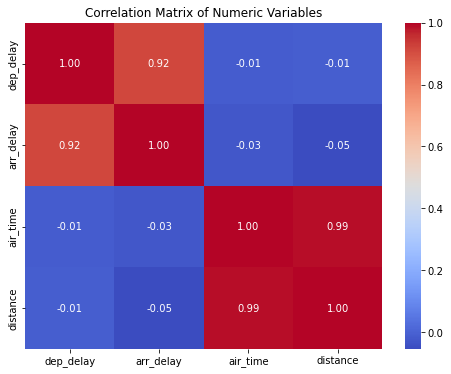

In [129]:
import seaborn as sns

# Correlation matrix
corr_matrix = flights_data[numeric_columns].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [121]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale numeric columns
numeric_columns = ['air_time', 'distance']
flights_data[numeric_columns] = scaler.fit_transform(flights_data[numeric_columns])
print(flights_data[numeric_columns])

       air_time  distance
0      0.438253  0.487012
1      0.292169  0.307629
2      0.533133  0.487012
3      0.170181  0.186337
4      0.042169  0.041317
...         ...       ...
32730  0.061747  0.050317
32731  0.397590  0.440581
32732  0.237952  0.267130
32733  0.106928  0.110861
32734  0.055723  0.063408

[32735 rows x 2 columns]


In [122]:
# Filter flights with departure delays greater than 30 minutes and arrival delays greater than 30 minutes
delayed_flights_30 = flights_data[(flights_data['dep_delay'] > 30) & (flights_data['arr_delay'] > 30)]


print(delayed_flights_30)

       year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
7      2013      8   13  19:20:00         85  20:32:00         71      B6   
9      2013      4   30  13:23:00         62  15:49:00         60      EV   
13     2013      3   25  20:54:00        115  22:56:00         91      FL   
23     2013      7    7  23:10:00        105  20:01:00        127      B6   
27     2013      4   24  22:53:00        123       NaT        101      EV   
...     ...    ...  ...       ...        ...       ...        ...     ...   
32707  2013      2    4  13:40:00         82  15:37:00         82      EV   
32709  2013      4   19  23:12:00        217  22:00:00        214      UA   
32713  2013      2    2  16:59:00         49  18:03:00         32      9E   
32721  2013      7   22  23:02:00        227  03:33:00        209      B6   
32733  2013     10   15  08:44:00         56  10:45:00         60      B6   

      tailnum  flight origin dest  air_time  distance  hour  minute  \
7   

In [123]:
# Filter flights with both departure and arrival delays greater than 30 minutes and select specific columns
delayed_flights_info = flights_data[(flights_data['dep_delay'] > 30) & (flights_data['arr_delay'] > 30)][['flight', 'origin', 'dest']]

# Display the information of flights meeting the criteria
print(delayed_flights_info)


       flight origin dest
7        1407    JFK  IAD
9        4162    EWR  JAX
13        645    LGA  ATL
23         97    JFK  DEN
27       3852    EWR  BUF
...       ...    ...  ...
32707    4135    EWR  CLT
32709     768    EWR  LAX
32713    3689    JFK  PHL
32721     108    JFK  PWM
32733    1273    JFK  CHS

[4037 rows x 3 columns]


In [124]:
# Sort by 'early_departure' in descending order and display the corresponding rows
descending_early_departure = flights_data.sort_values(by='early_dep', ascending=False)
print("Descending order of early departure:")
print(descending_early_departure[['flight', 'origin', 'dest', 'early_dep']].head())

# Sort by 'early_arrival' in descending order and display the corresponding rows
descending_early_arrival = flights_data.sort_values(by='early_arr', ascending=False)
print("\nDescending order of early arrival:")
print(descending_early_arrival[['flight', 'origin', 'dest', 'early_arr']].head())


Descending order of early departure:
       flight origin dest  early_dep
24194    1715    LGA  MSY       21.0
8285     3281    LGA  CMH       21.0
27076    1117    LGA  TPA       21.0
30412     383    LGA  FLL       20.0
21806    2680    EWR  BOS       20.0

Descending order of early arrival:
       flight origin dest  early_arr
31891    1628    EWR  SFO       73.0
2776       15    EWR  HNL       70.0
23979    1643    JFK  SEA       68.0
26465       6    JFK  SLC       68.0
5415     3403    JFK  MCI       68.0


In [125]:
# Sort by both 'early_dep' and 'early_arr' in descending order and display the corresponding rows
descending_early = flights_data.sort_values(by=['early_dep', 'early_arr'], ascending=[False, False])
print("Descending order of early departure and early arrival:")
print(descending_early[['flight', 'origin', 'dest', 'early_dep', 'early_arr']])


Descending order of early departure and early arrival:
       flight origin dest  early_dep  early_arr
27076    1117    LGA  TPA       21.0       42.0
8285     3281    LGA  CMH       21.0       36.0
24194    1715    LGA  MSY       21.0       17.0
22002       5    EWR  SEA       20.0       53.0
30412     383    LGA  FLL       20.0       25.0
...       ...    ...  ...        ...        ...
32718    4241    EWR  DCA        NaN        NaN
32721     108    JFK  PWM        NaN        NaN
32728    3525    JFK  ORD        NaN        NaN
32729    4419    EWR  IND        NaN        NaN
32733    1273    JFK  CHS        NaN        NaN

[32735 rows x 5 columns]


In [118]:
# Drop rows with NaN values in 'early_dep' or 'early_arr' columns
flights_data_cleaned = flights_data.dropna(subset=['early_dep', 'early_arr'], how='any')

# Sort by both 'early_dep' and 'early_arr' in descending order and display the corresponding rows
descending_early = flights_data_cleaned.sort_values(by=['early_dep', 'early_arr'], ascending=[False, False])

print("Descending order of early departure and early arrival (excluding NaN values):")
print(descending_early[['flight', 'origin', 'dest', 'early_dep', 'early_arr']])


Descending order of early departure and early arrival (excluding NaN values):
       flight origin dest  early_dep  early_arr
27076    1117    LGA  TPA       21.0       42.0
8285     3281    LGA  CMH       21.0       36.0
24194    1715    LGA  MSY       21.0       17.0
22002       5    EWR  SEA       20.0       53.0
30412     383    LGA  FLL       20.0       25.0
...       ...    ...  ...        ...        ...
30884     318    JFK  BOS        1.0        1.0
31598      29    JFK  TPA        1.0        1.0
32376    3209    LGA  DEN        1.0        1.0
32404    3621    JFK  DCA        1.0        1.0
32669     345    LGA  ORD        1.0        1.0

[14329 rows x 5 columns]


In [126]:
# Filter rows where 'early_dep' and 'early_arr' are exactly 5
filtered_data = flights_data[(flights_data['early_dep'] == 5) & (flights_data['early_arr'] == 5)]

# Sort by both 'early_dep' and 'early_arr' in descending order and display the corresponding rows
if not filtered_data.empty:
    descending_early_5 = filtered_data.sort_values(by=['early_dep', 'early_arr'], ascending=[False, False])
    print("Descending order of flights with early departure and arrival at 5 minutes:")
    print(descending_early_5[['flight', 'origin', 'dest', 'early_dep', 'early_arr']])
else:
    print("No flights found with early departure and arrival at exactly 5 minutes.")


Descending order of flights with early departure and arrival at 5 minutes:
       flight origin dest  early_dep  early_arr
246      3604    EWR  ORD        5.0        5.0
1092     4335    EWR  CMH        5.0        5.0
1131      602    JFK  PWM        5.0        5.0
1738      526    LGA  STL        5.0        5.0
2268     1377    LGA  ATL        5.0        5.0
3433      116    JFK  SYR        5.0        5.0
3757      874    LGA  MIA        5.0        5.0
4241      467    JFK  SLC        5.0        5.0
4422     3663    JFK  DCA        5.0        5.0
4549      611    JFK  JAX        5.0        5.0
5378     1547    LGA  ATL        5.0        5.0
5984     4495    EWR  SAV        5.0        5.0
6129      883    EWR  DFW        5.0        5.0
6729      601    JFK  FLL        5.0        5.0
7544     2003    LGA  MIA        5.0        5.0
7845      193    EWR  SFO        5.0        5.0
7871     4354    EWR  IAD        5.0        5.0
8086      677    JFK  LAX        5.0        5.0
10221    1331